## Back Test Results Binary Classification

In [114]:
import pandas as pd
from datetime import datetime, timezone
from pycaret.datasets import get_data
from pycaret.classification import *
import yaml
import time
import warnings
warnings.filterwarnings('ignore')

In [115]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    pair = cfg['currency']['pair']
    frac = cfg['model']['frac']
    random_state = cfg['model']['random_state']

In [116]:
print('Pair:', pair)
print('Fraction:', frac)
print('Random State:', random_state)

Pair: EURUSD
Fraction: 0.7
Random State: 850


In [117]:
now = datetime.now()
today = now.strftime("%d-%m-%Y_%I-%M_%p")

In [118]:
dataset = pd.read_csv('01_Back_Test_Data.csv')
dataset.shape

(4000, 23)

In [119]:
dataset.describe()

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,...,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
count,4000.000000,3999.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5502.490500,45.488461,0.496750,1.418951,-0.010051,3.029974,-0.004337,0.004258,1.418951,-0.010051,...,1.418951,-0.010051,3.029974,-0.004141,0.004076,1.418951,-0.010051,3.029974,-0.004154,0.004009
std,2801.626196,30.185911,0.500052,54.929762,56.546855,56.450526,0.003194,0.003288,54.929762,56.546855,...,54.929762,56.546855,56.450526,0.003172,0.003191,54.929762,56.546855,56.450526,0.003139,0.002952
min,4.000000,0.000000,0.000000,-100.000000,-100.000000,-100.000000,-0.028300,0.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-0.027400,0.000000,-100.000000,-100.000000,-100.000000,-0.027700,0.000000
25%,3229.750000,16.474562,0.000000,-45.689757,-50.540125,-46.951537,-0.005800,0.002000,-45.689757,-50.540125,...,-45.689757,-50.540125,-46.951537,-0.005600,0.001900,-45.689757,-50.540125,-46.951537,-0.005700,0.001900
50%,6419.000000,47.200990,0.000000,0.093046,0.023907,0.128112,-0.003600,0.003500,0.093046,0.023907,...,0.093046,0.023907,0.128112,-0.003300,0.003300,0.093046,0.023907,0.128112,-0.003400,0.003300
75%,7995.250000,72.361556,1.000000,49.988611,50.397004,56.070624,-0.002100,0.005600,49.988611,50.397004,...,49.988611,50.397004,56.070624,-0.001900,0.005400,49.988611,50.397004,56.070624,-0.001900,0.005400
max,9650.000000,100.000000,1.000000,98.578560,98.339304,99.741582,-0.000100,0.047900,98.578560,98.339304,...,98.578560,98.339304,99.741582,-0.000000,0.042500,98.578560,98.339304,99.741582,-0.000000,0.028900


In [120]:
dataset['Rec1_Close_Score'] = dataset['Rec1_Close_Score'].round()
dataset['Rec1_High_Score'] = dataset['Rec1_High_Score'].round()
dataset['Rec1_Low_Score'] = dataset['Rec1_Low_Score'].round()

dataset['Rec2_Close_Score'] = dataset['Rec2_Close_Score'].round()
dataset['Rec2_High_Score'] = dataset['Rec2_High_Score'].round()
dataset['Rec2_Low_Score'] = dataset['Rec2_Low_Score'].round()

dataset['Rec3_Close_Score'] = dataset['Rec3_Close_Score'].round()
dataset['Rec3_High_Score'] = dataset['Rec3_High_Score'].round()
dataset['Rec3_Low_Score'] = dataset['Rec3_Low_Score'].round()

dataset['Rec4_Close_Score'] = dataset['Rec4_Close_Score'].round()
dataset['Rec4_High_Score'] = dataset['Rec4_High_Score'].round()
dataset['Rec4_Low_Score'] = dataset['Rec4_Low_Score'].round()

In [121]:
dataset.head(10)

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,...,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,851.0,14.711971,0.0,-0.0,41.0,27.0,-0.0022,0.0033,-0.0,41.0,...,-0.0,41.0,27.0,-0.0026,0.0034,-0.0,41.0,27.0,-0.0016,0.0035
1,6600.0,8.748818,0.0,-78.0,-44.0,-81.0,-0.0090,0.0090,-78.0,-44.0,...,-78.0,-44.0,-81.0,-0.0040,0.0054,-78.0,-44.0,-81.0,-0.0033,0.0028
2,9216.0,80.176852,0.0,-43.0,-72.0,-63.0,-0.0027,0.0021,-43.0,-72.0,...,-43.0,-72.0,-63.0,-0.0027,0.0039,-43.0,-72.0,-63.0,-0.0041,0.0005
3,7297.0,77.682633,1.0,-12.0,-24.0,8.0,-0.0035,0.0031,-12.0,-24.0,...,-12.0,-24.0,8.0,-0.0079,0.0022,-12.0,-24.0,8.0,-0.0044,0.0034
4,4589.0,0.152034,0.0,3.0,18.0,-4.0,-0.0059,0.0060,3.0,18.0,...,3.0,18.0,-4.0,-0.0041,0.0006,3.0,18.0,-4.0,-0.0036,0.0008
5,6396.0,44.072199,0.0,-1.0,-43.0,-5.0,-0.0028,0.0047,-1.0,-43.0,...,-1.0,-43.0,-5.0,-0.0018,0.0042,-1.0,-43.0,-5.0,-0.0030,0.0041
6,4638.0,0.195912,0.0,-92.0,-91.0,-85.0,-0.0012,0.0109,-92.0,-91.0,...,-92.0,-91.0,-85.0,-0.0020,0.0022,-92.0,-91.0,-85.0,-0.0016,0.0027
7,9057.0,87.123909,0.0,-25.0,-16.0,-29.0,-0.0020,0.0035,-25.0,-16.0,...,-25.0,-16.0,-29.0,-0.0006,0.0042,-25.0,-16.0,-29.0,-0.0039,0.0059
8,7370.0,9.183030,1.0,-8.0,-43.0,-1.0,-0.0013,0.0134,-8.0,-43.0,...,-8.0,-43.0,-1.0,-0.0022,0.0018,-8.0,-43.0,-1.0,-0.0016,0.0033
9,9332.0,0.001268,0.0,46.0,46.0,26.0,-0.0049,0.0046,46.0,46.0,...,46.0,46.0,26.0,-0.0022,0.0021,46.0,46.0,26.0,-0.0016,0.0061


## Drop Predictions with Less than 15% LR Fit

In [122]:
dataset = dataset[dataset['Current_Market_Fit'] > 15]
dataset = dataset.reset_index()
del dataset['index']

In [123]:
dataset.shape

(3037, 23)

In [124]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
#    'Rec1_Score',
#    'Rec2_Score',
#    'Rec3_Score',
#    'Rec4_Score',
], axis=1)

In [125]:
dataset.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,0.0,-43.0,-72.0,-63.0,-0.0027,0.0021,-43.0,-72.0,-63.0,-0.0041,...,-43.0,-72.0,-63.0,-0.0027,0.0039,-43.0,-72.0,-63.0,-0.0041,0.0005
1,1.0,-12.0,-24.0,8.0,-0.0035,0.0031,-12.0,-24.0,8.0,-0.0050,...,-12.0,-24.0,8.0,-0.0079,0.0022,-12.0,-24.0,8.0,-0.0044,0.0034
2,0.0,-1.0,-43.0,-5.0,-0.0028,0.0047,-1.0,-43.0,-5.0,-0.0029,...,-1.0,-43.0,-5.0,-0.0018,0.0042,-1.0,-43.0,-5.0,-0.0030,0.0041
3,0.0,-25.0,-16.0,-29.0,-0.0020,0.0035,-25.0,-16.0,-29.0,-0.0040,...,-25.0,-16.0,-29.0,-0.0006,0.0042,-25.0,-16.0,-29.0,-0.0039,0.0059
4,1.0,51.0,30.0,50.0,-0.0047,0.0011,51.0,30.0,50.0,-0.0043,...,51.0,30.0,50.0,-0.0076,0.0007,51.0,30.0,50.0,-0.0038,0.0043


In [126]:
data = dataset.sample(frac=frac, random_state=random_state).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('Fraction: ' + str(frac))
#print('Random State: ', str(random_state))

Data for Modeling: (2126, 21)
Unseen Data For Predictions: (911, 21)
Fraction: 0.7


# Create Unseen DataFrame

In [127]:
data_unseen.shape

(911, 21)

In [128]:
data_unseen.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,1.0,-31.0,-59.0,-15.0,-0.0009,0.0016,-31.0,-59.0,-15.0,-0.0009,...,-31.0,-59.0,-15.0,-0.0072,0.0018,-31.0,-59.0,-15.0,-0.0059,0.0018
1,0.0,94.0,94.0,95.0,-0.0124,0.0021,94.0,94.0,95.0,-0.0047,...,94.0,94.0,95.0,-0.0005,0.0118,94.0,94.0,95.0,-0.0008,0.0060
2,0.0,-6.0,-51.0,-5.0,-0.0023,0.0057,-6.0,-51.0,-5.0,-0.0016,...,-6.0,-51.0,-5.0,-0.0056,0.0005,-6.0,-51.0,-5.0,-0.0045,0.0007
3,0.0,-0.0,-26.0,0.0,-0.0011,0.0056,-0.0,-26.0,0.0,-0.0035,...,-0.0,-26.0,0.0,-0.0020,0.0017,-0.0,-26.0,0.0,-0.0086,0.0018
4,1.0,81.0,89.0,93.0,-0.0157,0.0037,81.0,89.0,93.0,-0.0111,...,81.0,89.0,93.0,-0.0023,0.0079,81.0,89.0,93.0,-0.0068,0.0035


In [129]:
exp_name = setup(data = data,
                 target = 'Current_Market',
#                 fold_shuffle=True,
                 session_id=123,
                 silent=True,
#                 n_jobs = 64,
#                 imputation_type='iterative'
                ) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(2126, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [130]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5209,0.5238,0.5150,0.5181,0.5140,0.0416,0.0422,0.0050
ada,Ada Boost Classifier,0.5209,0.5198,0.5162,0.5174,0.5160,0.0416,0.0417,0.0210
gbc,Gradient Boosting Classifier,0.5195,0.5362,0.4810,0.5158,0.4972,0.0383,0.0384,0.0420
dt,Decision Tree Classifier,0.5188,0.5187,0.5080,0.5147,0.5106,0.0374,0.0375,0.0070
lda,Linear Discriminant Analysis,0.5182,0.5310,0.4974,0.5140,0.5049,0.0361,0.0361,0.0040
qda,Quadratic Discriminant Analysis,0.5135,0.5192,0.4851,0.5112,0.4956,0.0265,0.0269,0.0050
lightgbm,Light Gradient Boosting Machine,0.5135,0.5129,0.5028,0.5097,0.5057,0.0267,0.0268,0.0170
lr,Logistic Regression,0.5040,0.5254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
et,Extra Trees Classifier,0.5040,0.4949,0.4593,0.5002,0.4783,0.0073,0.0074,0.0790
ridge,Ridge Classifier,0.5034,0.0000,0.0000,0.0000,0.0000,-0.0013,-0.0082,0.0050


GaussianNB(priors=None, var_smoothing=1e-09)

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalar

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=F

In [70]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    model = cfg['model']['name']

In [71]:
print('Model Name:', model)

Model Name: gbc


In [72]:
MODEL = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5570,0.5550,0.5676,0.5526,0.5600,0.1142,0.1143
1,0.5369,0.5631,0.5541,0.5325,0.5430,0.0740,0.0741
2,0.5369,0.5634,0.4730,0.5385,0.5036,0.0730,0.0736
3,0.4497,0.4587,0.4054,0.4412,0.4225,-0.1013,-0.1016
4,0.4631,0.5375,0.4189,0.4559,0.4366,-0.0745,-0.0747
5,0.5638,0.5906,0.5541,0.5616,0.5578,0.1274,0.1274
6,0.5503,0.5692,0.4865,0.5538,0.5180,0.0999,0.1006
7,0.5034,0.5076,0.4595,0.5000,0.4789,0.0061,0.0061
8,0.5000,0.4553,0.4110,0.4918,0.4478,-0.0024,-0.0024
9,0.5473,0.5726,0.4932,0.5455,0.5180,0.0933,0.0937


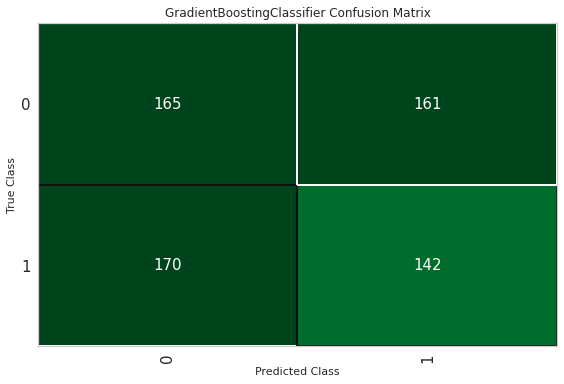

In [73]:
plot_model(MODEL, plot = 'confusion_matrix')

In [74]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4564,0.4564,0.4459,0.4521,0.4490,-0.0874,-0.0874
1,0.5436,0.5360,0.5676,0.5385,0.5526,0.0875,0.0877
2,0.5436,0.5402,0.5676,0.5385,0.5526,0.0875,0.0877
3,0.4966,0.5032,0.5405,0.4938,0.5161,-0.0061,-0.0061
4,0.5503,0.5166,0.5541,0.5467,0.5503,0.1007,0.1007
5,0.5101,0.4886,0.4595,0.5075,0.4823,0.0195,0.0196
6,0.5369,0.5541,0.5000,0.5362,0.5175,0.0734,0.0735
7,0.5034,0.4786,0.5000,0.5000,0.5000,0.0067,0.0067
8,0.4865,0.5215,0.4658,0.4789,0.4722,-0.0276,-0.0276
9,0.5203,0.5105,0.5479,0.5128,0.5298,0.0412,0.0413


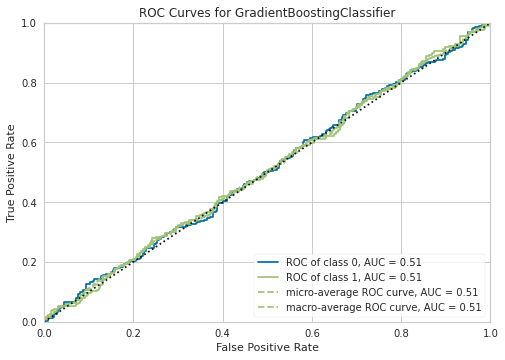

In [75]:
plot_model(TUNED_MODEL, plot = 'auc')

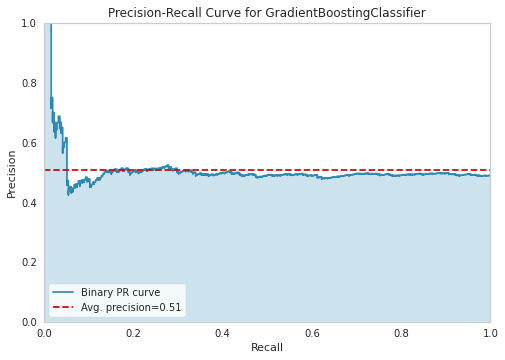

In [76]:
plot_model(TUNED_MODEL, plot = 'pr')

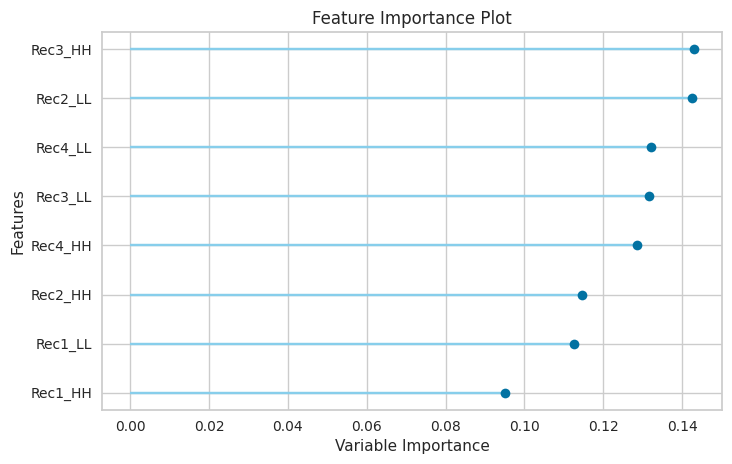

In [77]:
plot_model(TUNED_MODEL, plot='feature')

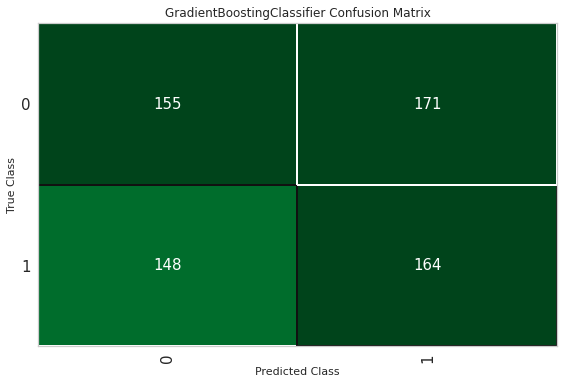

In [78]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [79]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5000,0.5075,0.5256,0.4896,0.5070,0.0011,0.0011


In [80]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [81]:
print(FINAL_MODEL)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [82]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9107,0.9814,0.9103,0.9073,0.9088,0.8212,0.8212


In [83]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL,Label,Score
0,1.0,-31.0,-59.0,-15.0,0.0009,0.0016,-31.0,-59.0,-15.0,0.0009,...,-15.0,0.0072,0.0018,-31.0,-59.0,-15.0,0.0059,0.0018,1.0,0.8906
1,0.0,94.0,94.0,95.0,0.0124,0.0021,94.0,94.0,95.0,0.0047,...,95.0,0.0005,0.0118,94.0,94.0,95.0,0.0008,0.0060,1.0,0.8255
2,0.0,-6.0,-51.0,-5.0,0.0023,0.0057,-6.0,-51.0,-5.0,0.0016,...,-5.0,0.0056,0.0005,-6.0,-51.0,-5.0,0.0045,0.0007,0.0,0.8155
3,0.0,-0.0,-26.0,0.0,0.0011,0.0056,-0.0,-26.0,0.0,0.0035,...,0.0,0.0020,0.0017,-0.0,-26.0,0.0,0.0086,0.0018,0.0,0.7053
4,1.0,81.0,89.0,93.0,0.0157,0.0037,81.0,89.0,93.0,0.0111,...,93.0,0.0023,0.0079,81.0,89.0,93.0,0.0068,0.0035,0.0,0.6624


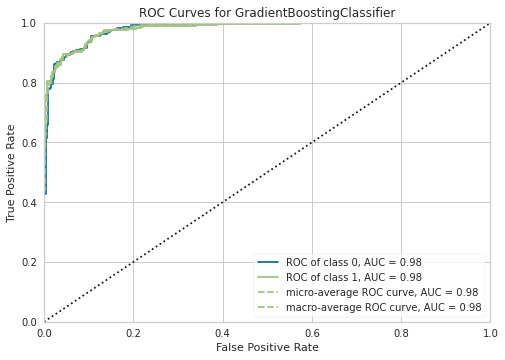

In [84]:
plot_model(FINAL_MODEL, plot = 'auc')

In [85]:
pkl_name = (today + "_" + model + "_" + pair)

In [86]:
save_model(FINAL_MODEL, pkl_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                             learning_rate=0.4, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
         

In [87]:
SAVED_FINAL_MODEL = load_model(pkl_name)

Transformation Pipeline and Model Successfully Loaded


In [88]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [89]:
data_unseen.shape

(911, 21)

In [90]:
new_prediction.head(20)

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL,Label,Score
0,1.0,-31.0,-59.0,-15.0,0.0009,0.0016,-31.0,-59.0,-15.0,0.0009,...,-15.0,0.0072,0.0018,-31.0,-59.0,-15.0,0.0059,0.0018,1.0,0.8906
1,0.0,94.0,94.0,95.0,0.0124,0.0021,94.0,94.0,95.0,0.0047,...,95.0,0.0005,0.0118,94.0,94.0,95.0,0.0008,0.0060,1.0,0.8255
2,0.0,-6.0,-51.0,-5.0,0.0023,0.0057,-6.0,-51.0,-5.0,0.0016,...,-5.0,0.0056,0.0005,-6.0,-51.0,-5.0,0.0045,0.0007,0.0,0.8155
3,0.0,-0.0,-26.0,0.0,0.0011,0.0056,-0.0,-26.0,0.0,0.0035,...,0.0,0.0020,0.0017,-0.0,-26.0,0.0,0.0086,0.0018,0.0,0.7053
4,1.0,81.0,89.0,93.0,0.0157,0.0037,81.0,89.0,93.0,0.0111,...,93.0,0.0023,0.0079,81.0,89.0,93.0,0.0068,0.0035,0.0,0.6624
5,0.0,-66.0,-73.0,-75.0,0.0037,0.0074,-66.0,-73.0,-75.0,0.0117,...,-75.0,0.0048,0.0046,-66.0,-73.0,-75.0,0.0066,0.0014,0.0,0.8354
6,1.0,6.0,-2.0,7.0,0.0018,0.0052,6.0,-2.0,7.0,0.0051,...,7.0,0.0063,0.0026,6.0,-2.0,7.0,0.0019,0.0061,1.0,0.9035
7,0.0,-0.0,52.0,13.0,0.0069,0.0026,-0.0,52.0,13.0,0.0076,...,13.0,0.0040,0.0028,-0.0,52.0,13.0,0.0016,0.0070,0.0,0.5759
8,1.0,66.0,79.0,76.0,0.0067,0.0017,66.0,79.0,76.0,0.0025,...,76.0,0.0086,0.0013,66.0,79.0,76.0,0.0007,0.0050,1.0,0.9735
9,1.0,40.0,32.0,78.0,0.0057,0.0029,40.0,32.0,78.0,0.0053,...,78.0,0.0018,0.0040,40.0,32.0,78.0,0.0023,0.0028,0.0,0.8208


In [91]:
file = open(today + "_" + model + "_binary_classification_log_" + pair + ".txt", "w")
file.write ("Date: " + today + "\n" + \
            "Currency Pair: " + pair + "\n" + \
            "Model: " + model + "\n" + \
            "Frac: " + str(frac) + "\n" + \
            "Random State: " + str(random_state) + "\n" )
file.close()

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=F

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalar

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=F

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex